In [32]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [33]:
df = pd.read_csv('Admission_Predict.csv')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
df.drop('Serial No.',axis=1,inplace=True)


In [37]:
df.loc[df['Chance of Admit']>=0.5,'Chance of Admit'] = 1
df.loc[df['Chance of Admit']<.5,'Chance of Admit'] = 0

In [38]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,1.0


In [39]:
X  = df.drop('Chance of Admit',axis=1)
Y = df['Chance of Admit']

In [40]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.1)

In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [43]:
y_predict = model.predict(xtest)

In [44]:
y_predict

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.])

In [46]:
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']

[Text(0.4375, 0.9545454545454546, 'CGPA <= 7.665\ngini = 0.136\nsamples = 450\nvalue = [33, 417]\nclass = 1'),
 Text(0.19230769230769232, 0.8636363636363636, 'GRE Score <= 300.5\ngini = 0.482\nsamples = 32\nvalue = [19, 13]\nclass = 0'),
 Text(0.07692307692307693, 0.7727272727272727, 'LOR <= 2.75\ngini = 0.198\nsamples = 18\nvalue = [16, 2]\nclass = 0'),
 Text(0.038461538461538464, 0.6818181818181818, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 0'),
 Text(0.11538461538461539, 0.6818181818181818, 'CGPA <= 7.44\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = 0'),
 Text(0.07692307692307693, 0.5909090909090909, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.15384615384615385, 0.5909090909090909, 'TOEFL Score <= 98.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(0.11538461538461539, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.19230769230769232, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.30769230769

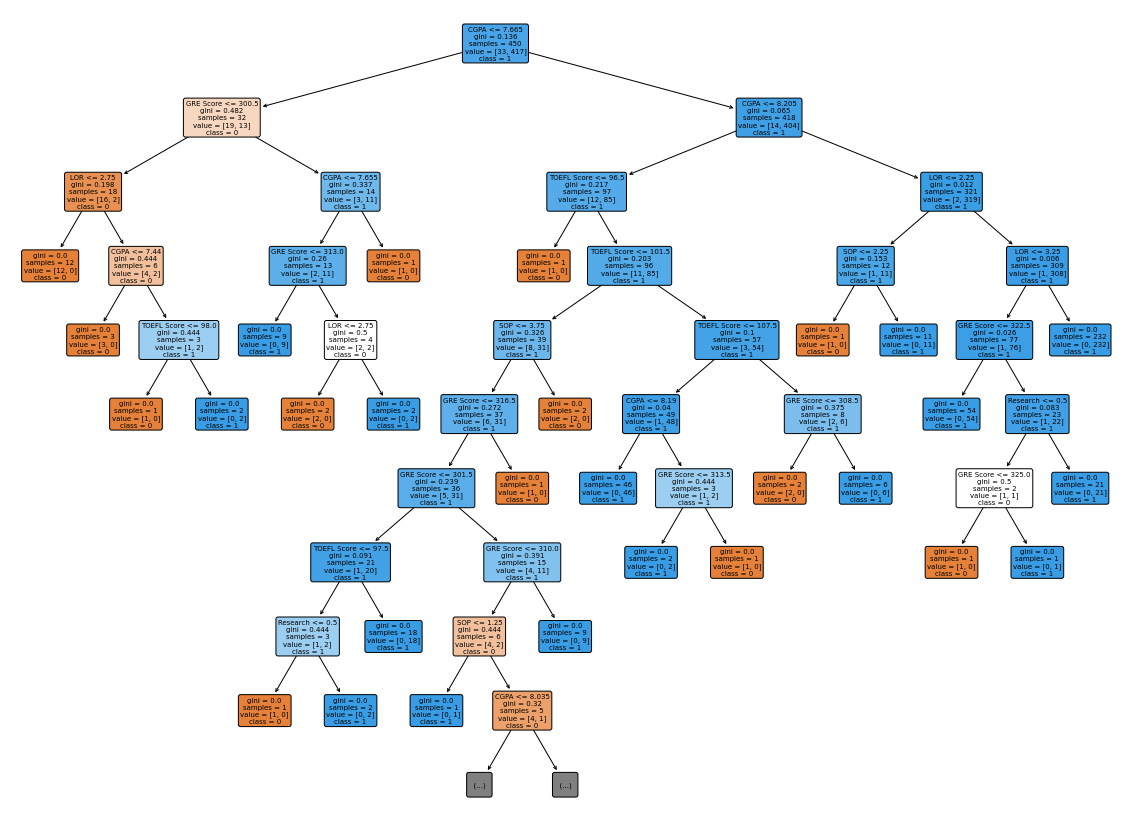

In [56]:
plt.figure(figsize=(20,15))
plot_tree(model,max_depth=9,feature_names=features,class_names=['0','1'],rounded=True,filled=True,fontsize=7)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_predict)

0.82